In [ ]:
# For neural network
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import *

## Read the data

In [ ]:
df = pd.read_csv('data1.csv')
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'target'],
      dtype='object')

## Drop education and native-country columns

In [ ]:
df = df.drop(columns=['education', 'native-country'], axis=1)
df.info()
# df.columns
# df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  target          32561 non-null  object
dtypes: int64(6), object(7)
memory usage: 3.2+ MB


## Combine the occupation in 5 categories

In [ ]:
dict = {x: str(i) for i , x in enumerate(list(df['occupation'].unique()))}
dict
encode_occupation = {' ?': '5',
 ' Adm-clerical': '1',
 ' Armed-Forces': '4',
 ' Craft-repair': '3',
 ' Exec-managerial': '1',
 ' Farming-fishing': '5',
 ' Handlers-cleaners': '5',
 ' Machine-op-inspct': '2',
 ' Other-service': '5',
 ' Priv-house-serv': '5',
 ' Prof-specialty': '1',
 ' Protective-serv': '4',
 ' Sales': '3',
 ' Tech-support': '2',
 ' Transport-moving': '3'}
df.replace({"occupation" : encode_occupation}, inplace=True)

In [ ]:
df['occupation'].value_counts()

1    11976
3     9346
5     7651
2     2930
4      658
Name: occupation, dtype: int64

## Column Statistics (of numerical data)

In [ ]:
df.describe()[1:][['age','fnlwgt','education-num', 'capital-gain', 'capital-loss', 'hours-per-week']].T.style.background_gradient(cmap='Blues')

,mean,std,min,25%,50%,75%,max
age,38.581647,13.640433,17.000000,28.000000,37.000000,48.000000,90.000000
fnlwgt,189778.366512,105549.977697,12285.000000,117827.000000,178356.000000,237051.000000,1484705.000000
education-num,10.080679,2.572720,1.000000,9.000000,10.000000,12.000000,16.000000
capital-gain,1077.648844,7385.292085,0.000000,0.000000,0.000000,0.000000,99999.000000
capital-loss,87.303830,402.960219,0.000000,0.000000,0.000000,0.000000,4356.000000
hours-per-week,40.437456,12.347429,1.000000,40.000000,40.000000,45.000000,99.000000


## Column Statistics (of categorical data)

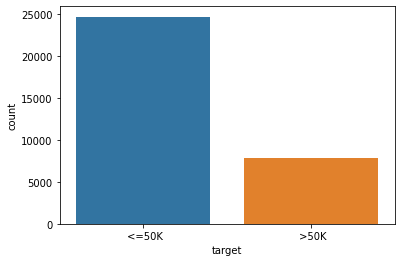

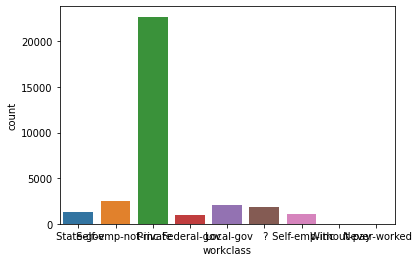

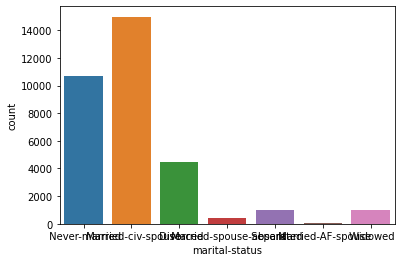

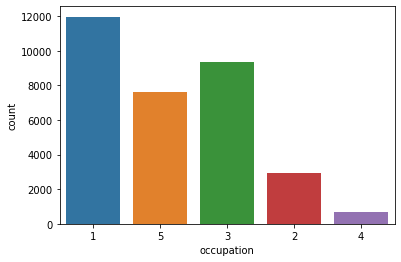

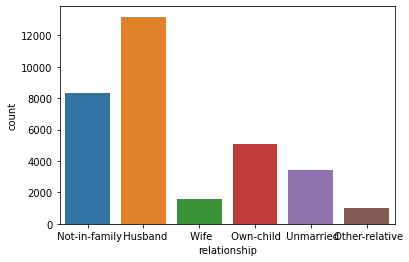

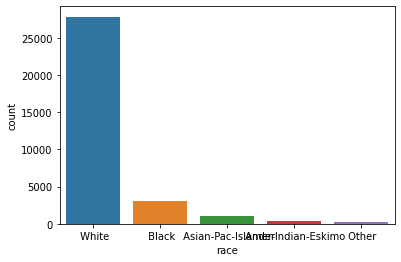

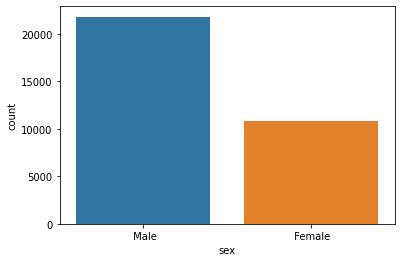

In [ ]:
import seaborn as sns
categ = ['target', 'workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex']
for nome in categ:
    ax = sns.countplot(x=nome, data=df)
    plt.show()

## ENCODING

In [ ]:
categB = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'target']

In [ ]:
le = LabelEncoder()
for col in categB:
    df[col] = le.fit_transform(df[col])

# le = LabelEncoder()
# for col in categB:
#     df[col] = le.fit_transform(df[col])

# df.head()

In [ ]:
df = pd.get_dummies(df,columns=['workclass', 'marital-status', 'occupation', 'relationship', 'race'],
                    prefix=['class','status','occup', 'relation', 'race'])
# df.head()

## Split the data tp train and validation data

In [ ]:
train_df, val_df = train_test_split(df, test_size=0.3, stratify=df['target'], random_state=123)
print(train_df['target'].value_counts())
print(val_df['target'].value_counts())

0    17303
1     5489
Name: target, dtype: int64
0    7417
1    2352
Name: target, dtype: int64


## BALANCE CLASSES by resampling from the data

In [ ]:
class_0 =train_df[train_df['target']==0]
class_1 =train_df[train_df['target']==1]
aug = class_1.sample(len(class_0),replace=True)

In [ ]:
train_df = pd.concat([class_0,aug],axis=0)
train_df.head()

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,target,class_0,class_1,...,relation_1,relation_2,relation_3,relation_4,relation_5,race_0,race_1,race_2,race_3,race_4
31955,46,267952,11,0,0,0,36,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4817,27,116531,13,0,0,0,40,0,0,0,...,1,0,0,0,0,0,0,0,0,1
11002,25,197036,6,1,0,0,40,0,0,0,...,0,0,1,0,0,0,0,0,0,1
20174,21,207103,9,1,0,0,40,0,0,0,...,0,0,1,0,0,0,0,0,0,1
29969,48,207817,9,0,0,0,32,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [ ]:
print(train_df['target'].value_counts())
train_df.columns

0    17303
1    17303
Name: target, dtype: int64


Index(['age', 'fnlwgt', 'education-num', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'target', 'class_0', 'class_1', 'class_2', 'class_3',
       'class_4', 'class_5', 'class_6', 'class_7', 'class_8', 'status_0',
       'status_1', 'status_2', 'status_3', 'status_4', 'status_5', 'status_6',
       'occup_0', 'occup_1', 'occup_2', 'occup_3', 'occup_4', 'relation_0',
       'relation_1', 'relation_2', 'relation_3', 'relation_4', 'relation_5',
       'race_0', 'race_1', 'race_2', 'race_3', 'race_4'],
      dtype='object')

## Seperate the target

In [ ]:
#  train data
y_train = train_df['target']
x_train = train_df.drop(labels=['target'],axis=1)


In [ ]:
# validation data
y_val = val_df['target']
x_val = val_df.drop(labels=['target'],axis=1)
# x_val


# Build a Feedforward neural network

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 39)]              0         
                                                                 
 dense_76 (Dense)            (None, 16)                640       
                                                                 
 dense_77 (Dense)            (None, 16)                272       
                                                                 
 dense_78 (Dense)            (None, 32)                544       
                                                                 
 dense_79 (Dense)            (None, 32)                1056      
                                                                 
 dense_80 (Dense)            (None, 64)                2112      
                                                                 
 dense_81 (Dense)            (None, 64)                416

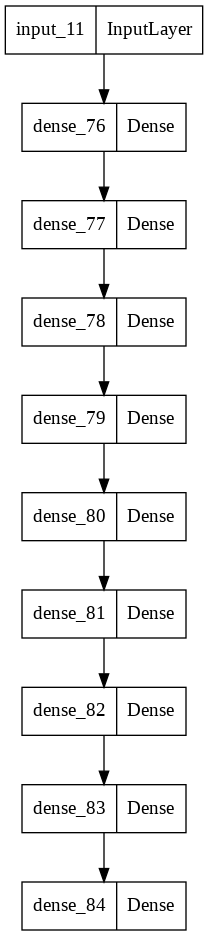

In [ ]:
inp = Input(39)
x = Dense(16, activation='elu')(inp)
x = Dense(16, activation='elu')(x)
x = Dense(32, activation='elu')(x)
x = Dense(32, activation='elu')(x)
x = Dense(64, activation='elu')(x)
x = Dense(64, activation='elu')(x)
x = Dense(128, activation='elu')(x)
x = Dense(128, activation='elu')(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inp, output)

model.summary()
plot_model(model)



## Compile and train the network

In [ ]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=1e-04)
model.compile(optimizer= opt, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=120, validation_data=(x_val, y_val))

Epoch 1/120
1082/1082 [==============================] - 7s 5ms/step - loss: 7.6113 - accuracy: 0.5383 - val_loss: 10.9632 - val_accuracy: 0.2408
Epoch 2/120
1082/1082 [==============================] - 4s 4ms/step - loss: 5.1658 - accuracy: 0.5470 - val_loss: 0.7234 - val_accuracy: 0.7891
Epoch 3/120
1082/1082 [==============================] - 4s 4ms/step - loss: 3.8721 - accuracy: 0.5507 - val_loss: 8.0370 - val_accuracy: 0.2408
Epoch 4/120
1082/1082 [==============================] - 4s 4ms/step - loss: 3.0868 - accuracy: 0.5542 - val_loss: 0.7668 - val_accuracy: 0.7855
Epoch 5/120
1082/1082 [==============================] - 4s 4ms/step - loss: 2.3388 - accuracy: 0.5596 - val_loss: 1.4357 - val_accuracy: 0.7979
Epoch 6/120
1082/1082 [==============================] - 4s 4ms/step - loss: 2.3075 - accuracy: 0.5567 - val_loss: 2.1732 - val_accuracy: 0.2438
Epoch 7/120
1082/1082 [==============================] - 4s 4ms/step - loss: 1.9521 - accuracy: 0.5593 - val_loss: 3.8808 - val_a

In [ ]:
y_pred = model.predict(x_val)
predictions = 1*(y_pred > 0.68)

# y_pred.shape
# y_val.shape
# predictions.shape

## Evaluation on validation data

In [ ]:
# confusin matrix to compare the predicted data and real labels
confusion_matrix(y_val, predictions)

array([[6445,  972],
       [ 733, 1619]])

In [ ]:
print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88      7417
           1       0.62      0.69      0.66      2352

    accuracy                           0.83      9769
   macro avg       0.76      0.78      0.77      9769
weighted avg       0.83      0.83      0.83      9769



## Visualization of model performance

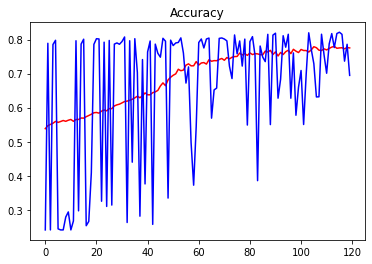

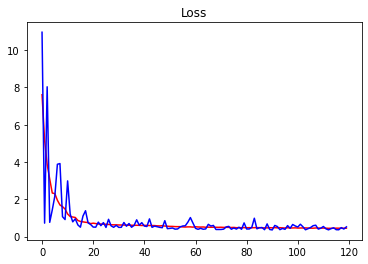

In [ ]:
plt.plot(history.history['accuracy'], c='r')
plt.plot(history.history['val_accuracy'], c='b')
plt.title('Accuracy')
plt.show()

plt.plot(history.history['loss'], c='r')
plt.plot(history.history['val_loss'], c='b')
plt.title('Loss')
plt.show()

## Analysing the results

At first, I used 4 layers with few neurons with Relu as activation function to build the Neural Network. The model did nt perform well, as it was underfitting (it was not performing well even on the train data). Since we are only required to work on the model part (without feature engineering), the underfitting was caused by the fact that our model was too simple to handle these complex data, so I tried to add more layers with more neurons and used a different activation function(Elu) to the model to improve its perfomance, and the results were more satisfactory as the accuracy of both training and validation improved (although the fluctuation in the validation accuracy is inevitable).

for the validation part, I changed the threshod to improve the precision and recall of the model and the reasonable threshod was between 0.65 and 0.7.